## ANALYSIS_7 - Segmentation of Conversion Rate

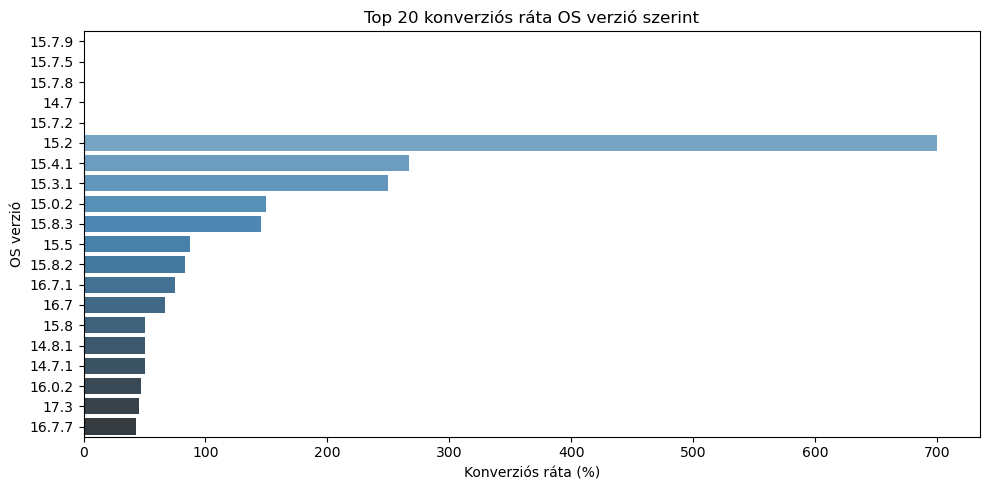

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

source_dir = r"C:\Users\user\Desktop\.....\PY_10_PYClean_Source_V8"
file_path = os.path.join(source_dir, 'user_level_master.csv')

# Data load
df = pd.read_csv(file_path, parse_dates=['event_datetime'])

# Filtering a two main conversion event
trial_df = df[df['event'].isin(['trial_started_event', 'trial_converted_event'])].copy()

# Conversion according to OS version
os_summary = trial_df.groupby(['os_version', 'event'])['distinct_id'].nunique().unstack().fillna(0)
os_summary['conversion_rate'] = round(os_summary['trial_converted_event'] / os_summary['trial_started_event'] * 100, 2)

plt.figure(figsize=(10, 5))
top_20 = os_summary.sort_values('conversion_rate', ascending=False).reset_index().head(20)
sns.barplot(data=top_20, x='conversion_rate', y='os_version', palette='Blues_d')
plt.title('Top 20 konverziós ráta OS verzió szerint')
plt.xlabel('Konverziós ráta (%)')
plt.ylabel('OS verzió')
plt.tight_layout()
plt.show()

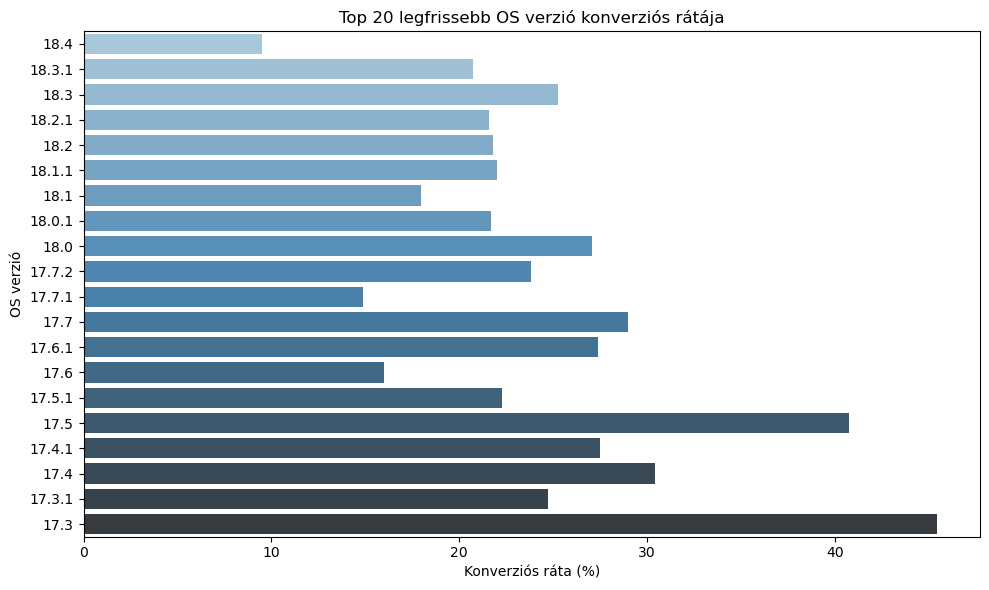

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from packaging import version  # To correctly compare version numbers

source_dir = r"C:\Users\user\Desktop\.....\PY_10_PYClean_Source_V8"
file_path = os.path.join(source_dir, 'user_level_master.csv')

# Data load
df = pd.read_csv(file_path, parse_dates=['event_datetime'])

# Filtering a two main conversion event
trial_df = df[df['event'].isin(['trial_started_event', 'trial_converted_event'])].copy()

# Conversion according to OS version
os_summary = trial_df.groupby(['os_version', 'event'])['distinct_id'].nunique().unstack().fillna(0)

# Conversion rate calculation
os_summary['conversion_rate'] = round(os_summary['trial_converted_event'] / os_summary['trial_started_event'] * 100, 2)

# Remove missing and unreadable versions
os_summary = os_summary.reset_index()
os_summary = os_summary.dropna(subset=['os_version'])

# Converting and sorting a version number into an object
os_summary['version_obj'] = os_summary['os_version'].apply(lambda x: version.parse(str(x)))
os_summary = os_summary.sort_values('version_obj', ascending=False)

# Top 20 latest versions and related conversions
top_20 = os_summary.head(20)

# Diagram
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20, x='conversion_rate', y='os_version', palette='Blues_d')
plt.title('Top 20 legfrissebb OS verzió konverziós rátája')
plt.xlabel('Konverziós ráta (%)')
plt.ylabel('OS verzió')
plt.tight_layout()
plt.show()


C:\Users\user\anaconda3\lib\site-packages\matplotlib\transforms.py:378: RuntimeWarning: invalid value encountered in scalar subtract
  return points[1, 0] - points[0, 0]
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


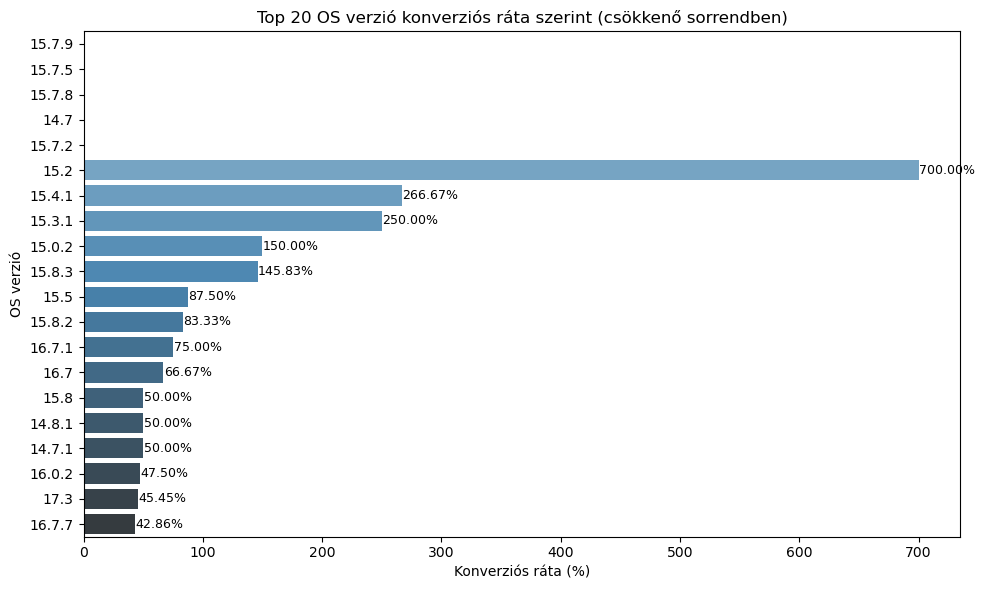

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from packaging import version

source_dir = r"C:\Users\user\Desktop\.....\PY_10_PYClean_Source_V8"
file_path = os.path.join(source_dir, 'user_level_master.csv')

# Data load
df = pd.read_csv(file_path, parse_dates=['event_datetime'])

# Only Conversion events
trial_df = df[df['event'].isin(['trial_started_event', 'trial_converted_event'])].copy()

# Summary by OS version
os_summary = trial_df.groupby(['os_version', 'event'])['distinct_id'].nunique().unstack().fillna(0)
os_summary['conversion_rate'] = round(os_summary['trial_converted_event'] / os_summary['trial_started_event'] * 100, 2)

# Processing versions
os_summary = os_summary.reset_index()
os_summary = os_summary.dropna(subset=['os_version'])
os_summary['version_obj'] = os_summary['os_version'].apply(lambda x: version.parse(str(x)))

# 20 best conversion rates (not the latest versions!)
top_20 = os_summary.sort_values('conversion_rate', ascending=False).head(20)

# Create a Barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_20, x='conversion_rate', y='os_version', palette='Blues_d')

# Write values at the end of bars
for i, (value, label) in enumerate(zip(top_20['conversion_rate'], top_20['os_version'])):
    ax.text(value + 0.5, i, f'{value:.2f}%', va='center', fontsize=9)

plt.title('Top 20 OS verzió konverziós ráta szerint (csökkenő sorrendben)')
plt.xlabel('Konverziós ráta (%)')
plt.ylabel('OS verzió')
plt.tight_layout()
plt.show()


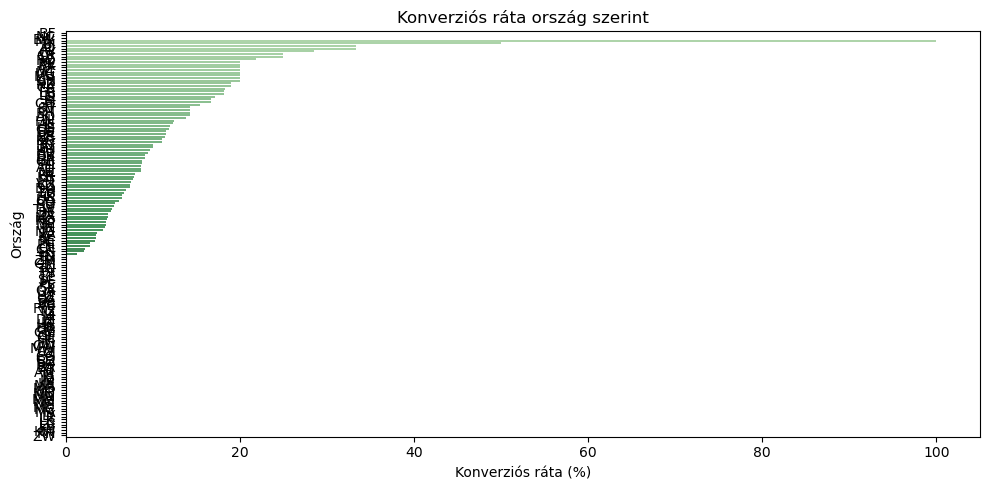

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

source_dir = r"C:\Users\user\Desktop\.....\PY_10_PYClean_Source_V8"
file_path = os.path.join(source_dir, 'user_level_master.csv')

# Data load
df = pd.read_csv(file_path, parse_dates=['event_datetime'])

# Filtering only a two main conversion event
trial_df = df[df['event'].isin(['trial_started_event', 'trial_converted_event'])].copy()

# Conversion according to Country
country_summary = trial_df.groupby(['country_code', 'event'])['distinct_id'].nunique().unstack().fillna(0)
country_summary['conversion_rate'] = round(country_summary['trial_converted_event'] / country_summary['trial_started_event'] * 100, 2)

plt.figure(figsize=(10, 5))
sns.barplot(data=country_summary.sort_values('conversion_rate', ascending=False).reset_index(), x='conversion_rate', y='country_code', palette='Greens_d')
plt.title('Konverziós ráta ország szerint')
plt.xlabel('Konverziós ráta (%)')
plt.ylabel('Ország')
plt.tight_layout()
plt.show()


C:\Users\user\anaconda3\lib\site-packages\matplotlib\transforms.py:378: RuntimeWarning: invalid value encountered in scalar subtract
  return points[1, 0] - points[0, 0]
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


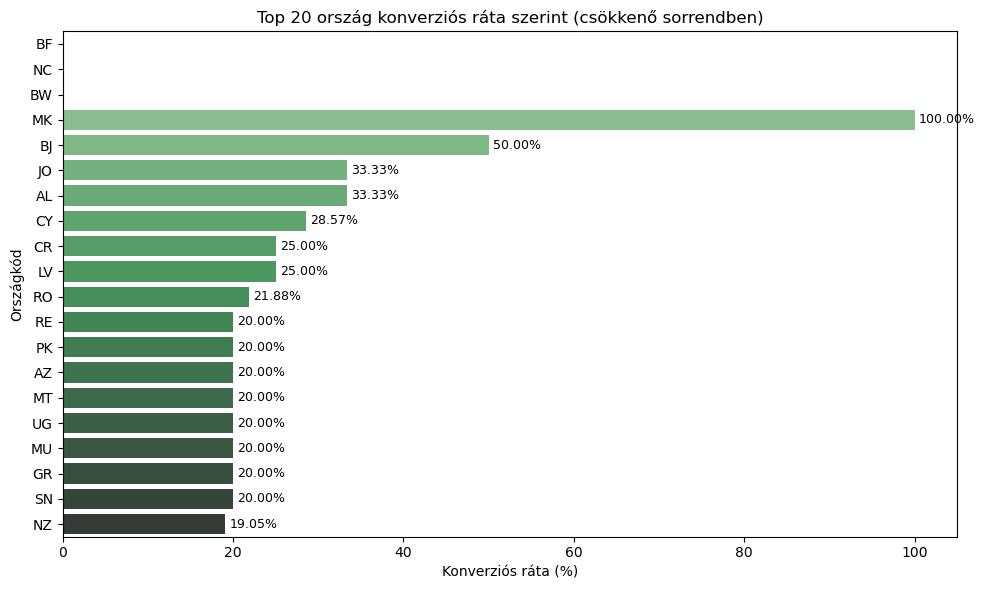

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

source_dir = r"C:\Users\user\Desktop\.....\PY_10_PYClean_Source_V8"
file_path = os.path.join(source_dir, 'user_level_master.csv')

# Data load
df = pd.read_csv(file_path, parse_dates=['event_datetime'])

# Filtering only a two main conversion event
trial_df = df[df['event'].isin(['trial_started_event', 'trial_converted_event'])].copy()

# Summary by country
country_summary = trial_df.groupby(['country_code', 'event'])['distinct_id'].nunique().unstack().fillna(0)
country_summary['conversion_rate'] = round(country_summary['trial_converted_event'] / country_summary['trial_started_event'] * 100, 2)

# Top 20 countries according to conversion rate
top_20_countries = country_summary.sort_values('conversion_rate', ascending=False).reset_index().head(20)

# Diagram
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_20_countries, x='conversion_rate', y='country_code', palette='Greens_d')

# Write values to the bars
for i, value in enumerate(top_20_countries['conversion_rate']):
    ax.text(value + 0.5, i, f'{value:.2f}%', va='center', fontsize=9)

plt.title('Top 20 ország konverziós ráta szerint (csökkenő sorrendben)')
plt.xlabel('Konverziós ráta (%)')
plt.ylabel('Országkód')
plt.tight_layout()
plt.show()


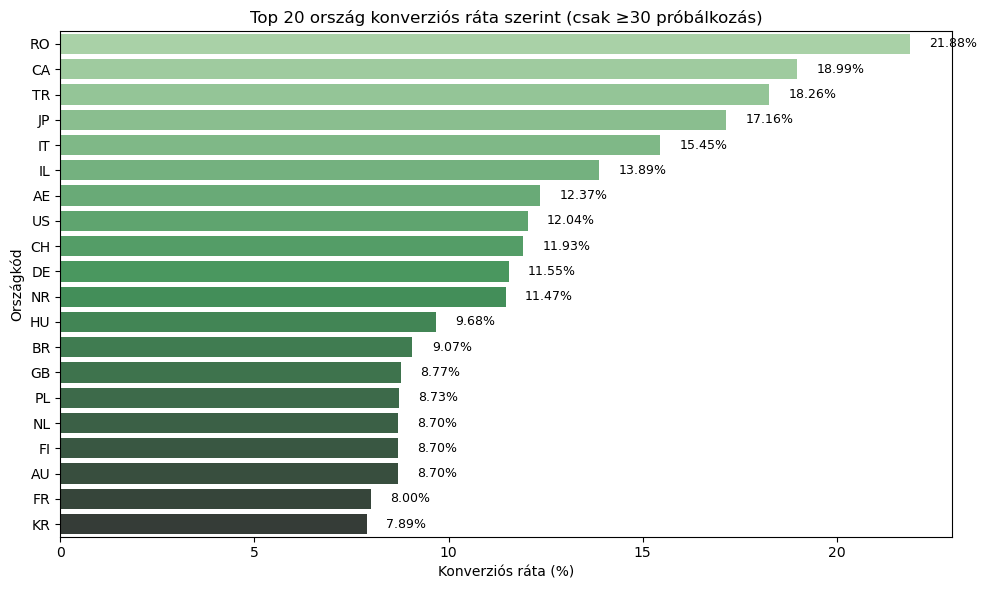

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

source_dir = r"C:\Users\user\Desktop\.....\PY_10_PYClean_Source_V8"
file_path = os.path.join(source_dir, 'user_level_master.csv')

df = pd.read_csv(file_path, parse_dates=['event_datetime'])

# Filtering only a two main conversion event
trial_df = df[df['event'].isin(['trial_started_event', 'trial_converted_event'])].copy()

# Summary by country
country_summary = trial_df.groupby(['country_code', 'event'])['distinct_id'].nunique().unstack().fillna(0)

# Filtering: at least 30 attempts required
country_summary = country_summary[country_summary['trial_started_event'] >= 30].copy()

# Conversion rate calculation
country_summary['conversion_rate'] = round(
    country_summary['trial_converted_event'] / country_summary['trial_started_event'] * 100, 2
)

# Top 20 countries according to conversion rate
top_20_countries = country_summary.sort_values('conversion_rate', ascending=False).reset_index().head(20)

# Diagram
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_20_countries, x='conversion_rate', y='country_code', palette='Greens_d')

# Write values to the bars
for i, value in enumerate(top_20_countries['conversion_rate']):
    ax.text(value + 0.5, i, f'{value:.2f}%', va='center', fontsize=9)

plt.title('Top 20 ország konverziós ráta szerint (csak ≥30 próbálkozás)')
plt.xlabel('Konverziós ráta (%)')
plt.ylabel('Országkód')
plt.tight_layout()
plt.show()


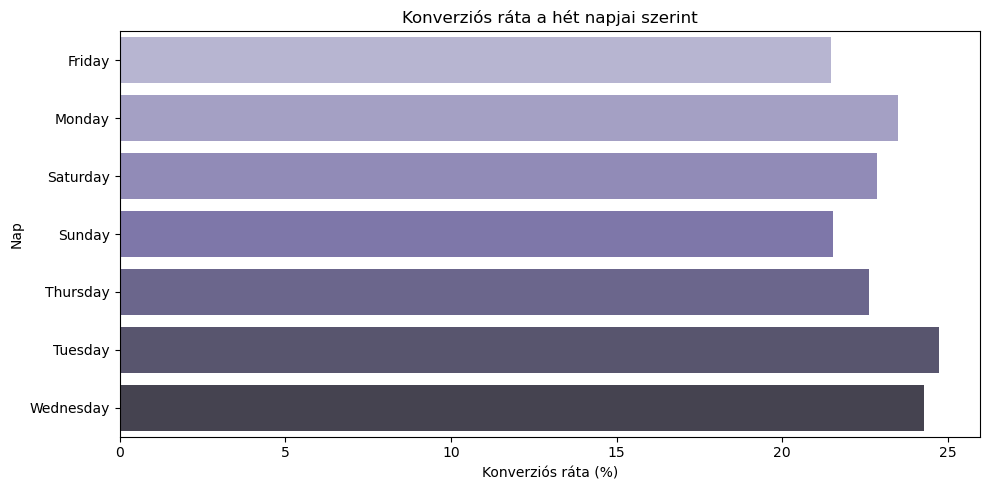

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

source_dir = r"C:\Users\user\Desktop\.....\PY_10_PYClean_Source_V8"
file_path = os.path.join(source_dir, 'user_level_master.csv')

df = pd.read_csv(file_path, parse_dates=['event_datetime'])

# Filtering only a two main conversion event
trial_df = df[df['event'].isin(['trial_started_event', 'trial_converted_event'])].copy()

# Conversion by time (day/month)
trial_df['weekday'] = trial_df['event_datetime'].dt.day_name()
trial_df['month'] = trial_df['event_datetime'].dt.month_name()

# Days of week
weekday_summary = trial_df.groupby(['weekday', 'event'])['distinct_id'].nunique().unstack().fillna(0)
weekday_summary['conversion_rate'] = round(weekday_summary['trial_converted_event'] / weekday_summary['trial_started_event'] * 100, 2)

# Months
month_summary = trial_df.groupby(['month', 'event'])['distinct_id'].nunique().unstack().fillna(0)
month_summary['conversion_rate'] = round(month_summary['trial_converted_event'] / month_summary['trial_started_event'] * 100, 2)

plt.figure(figsize=(10, 5))
sns.barplot(data=weekday_summary.reset_index(), x='conversion_rate', y='weekday', palette='Purples_d')
plt.title('Konverziós ráta a hét napjai szerint')
plt.xlabel('Konverziós ráta (%)')
plt.ylabel('Nap')
plt.tight_layout()
plt.show()



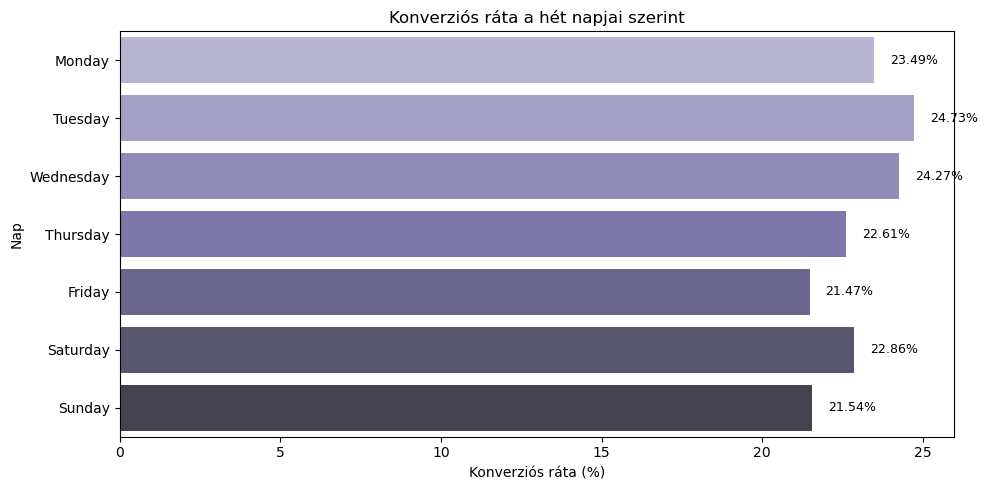

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

source_dir = r"C:\Users\user\Desktop\.....\PY_10_PYClean_Source_V8"
file_path = os.path.join(source_dir, 'user_level_master.csv')

df = pd.read_csv(file_path, parse_dates=['event_datetime'])

# Filtering only a two main conversion event
trial_df = df[df['event'].isin(['trial_started_event', 'trial_converted_event'])].copy()

# Extracting date columns
trial_df['weekday'] = trial_df['event_datetime'].dt.day_name()
trial_df['month'] = trial_df['event_datetime'].dt.month_name()

# Determining the order of the days of the week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trial_df['weekday'] = pd.Categorical(trial_df['weekday'], categories=ordered_days, ordered=True)

# Conversion by day of the week
weekday_summary = trial_df.groupby(['weekday', 'event'])['distinct_id'].nunique().unstack().fillna(0)
weekday_summary['conversion_rate'] = round(weekday_summary['trial_converted_event'] / weekday_summary['trial_started_event'] * 100, 2)

# Diagram
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=weekday_summary.reset_index(), x='conversion_rate', y='weekday', palette='Purples_d')

# Writing values
for i, value in enumerate(weekday_summary['conversion_rate']):
    ax.text(value + 0.5, i, f'{value:.2f}%', va='center', fontsize=9)

plt.title('Konverziós ráta a hét napjai szerint')
plt.xlabel('Konverziós ráta (%)')
plt.ylabel('Nap')
plt.tight_layout()
plt.show()


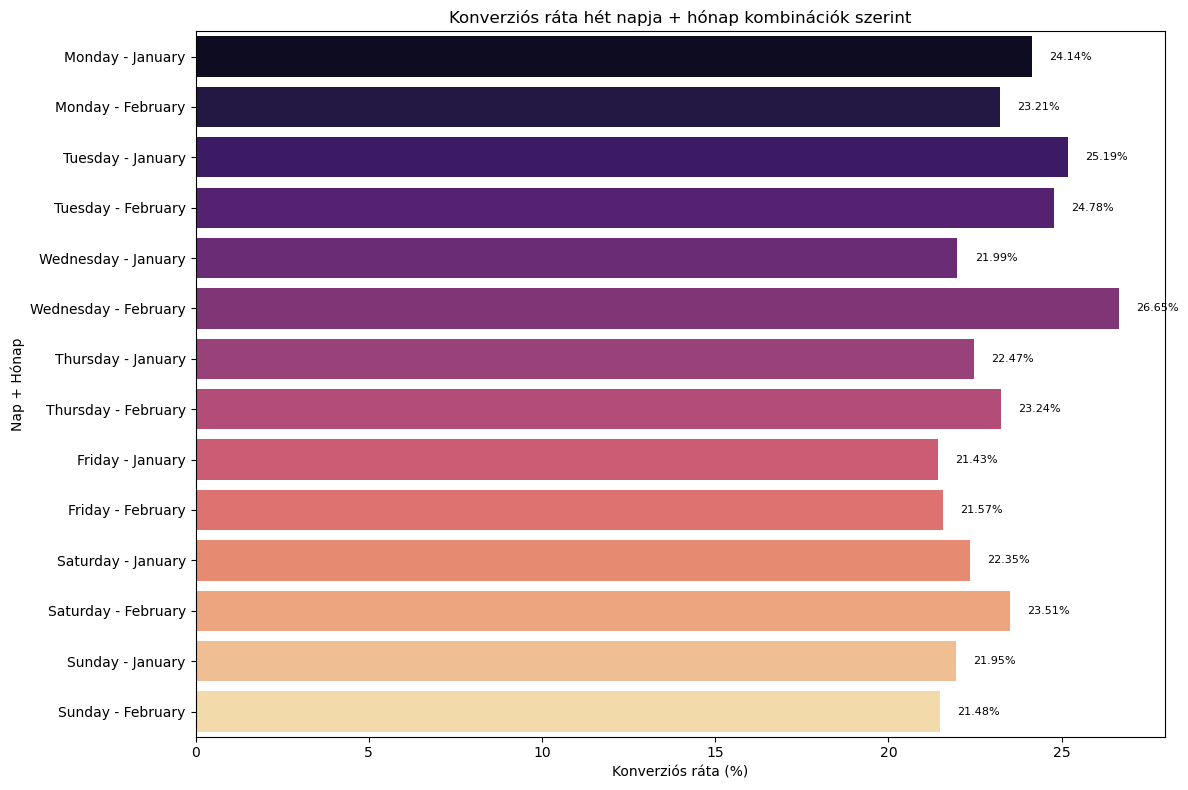

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

source_dir = r"C:\Users\user\Desktop\.....\PY_10_PYClean_Source_V8"
file_path = os.path.join(source_dir, 'user_level_master.csv')

df = pd.read_csv(file_path, parse_dates=['event_datetime'])

# Filtering only a two main conversion event
trial_df = df[df['event'].isin(['trial_started_event', 'trial_converted_event'])].copy()

# Day & month column 
trial_df['weekday'] = trial_df['event_datetime'].dt.day_name()
trial_df['month'] = trial_df['event_datetime'].dt.month_name()

# Category rankings
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

trial_df['weekday'] = pd.Categorical(trial_df['weekday'], categories=weekday_order, ordered=True)
trial_df['month'] = pd.Categorical(trial_df['month'], categories=month_order, ordered=True)

# New column: Month + Day combination
trial_df['weekday_month'] = trial_df['weekday'].astype(str) + ' - ' + trial_df['month'].astype(str)

# Grouping + conversion rate calculation
combo_summary = trial_df.groupby(['weekday_month', 'event'])['distinct_id'].nunique().unstack().fillna(0)
combo_summary['conversion_rate'] = round(combo_summary['trial_converted_event'] / combo_summary['trial_started_event'] * 100, 2)

# Order of combinations: order of days by month (e.g. Monday-Jan, Monday-Feb, ..., Sunday-Feb)
combo_summary = combo_summary.reset_index()
combo_summary['weekday'] = combo_summary['weekday_month'].str.extract(r'^(.*) - ')[0]
combo_summary['month'] = combo_summary['weekday_month'].str.extract(r'- (.*)$')[0]
combo_summary['weekday'] = pd.Categorical(combo_summary['weekday'], categories=weekday_order, ordered=True)
combo_summary['month'] = pd.Categorical(combo_summary['month'], categories=month_order, ordered=True)

# Sorting
combo_summary = combo_summary.sort_values(by=['weekday', 'month'])

# Diagram
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=combo_summary, x='conversion_rate', y='weekday_month', palette='magma')

# Values
for i, value in enumerate(combo_summary['conversion_rate']):
    ax.text(value + 0.5, i, f'{value:.2f}%', va='center', fontsize=8)

plt.title('Konverziós ráta hét napja + hónap kombinációk szerint')
plt.xlabel('Konverziós ráta (%)')
plt.ylabel('Nap + Hónap')
plt.tight_layout()
plt.show()


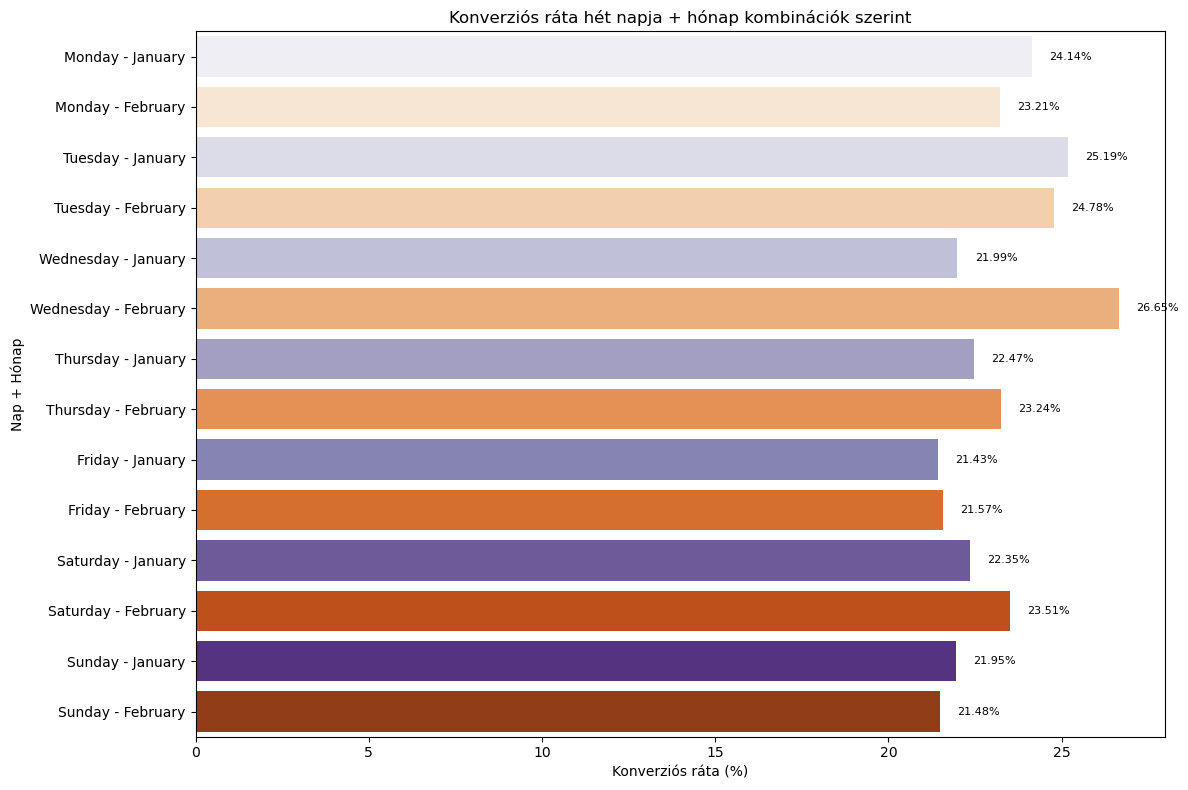

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

source_dir = r"C:\Users\user\Desktop\.....\PY_10_PYClean_Source_V8"
file_path = os.path.join(source_dir, 'user_level_master.csv')

df = pd.read_csv(file_path, parse_dates=['event_datetime'])

trial_df = df[df['event'].isin(['trial_started_event', 'trial_converted_event'])].copy()

# Day & month column 
trial_df['weekday'] = trial_df['event_datetime'].dt.day_name()
trial_df['month'] = trial_df['event_datetime'].dt.month_name()

# Category rankings
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

trial_df['weekday'] = pd.Categorical(trial_df['weekday'], categories=weekday_order, ordered=True)
trial_df['month'] = pd.Categorical(trial_df['month'], categories=month_order, ordered=True)

# New column: Month + Day combination
trial_df['weekday_month'] = trial_df['weekday'].astype(str) + ' - ' + trial_df['month'].astype(str)

# Grouping + conversion rate calculation
combo_summary = trial_df.groupby(['weekday_month', 'event'])['distinct_id'].nunique().unstack().fillna(0)
combo_summary['conversion_rate'] = round(combo_summary['trial_converted_event'] / combo_summary['trial_started_event'] * 100, 2)

# Order of combinations: order of days by months
combo_summary = combo_summary.reset_index()
combo_summary['weekday'] = combo_summary['weekday_month'].str.extract(r'^(.*) - ')[0]
combo_summary['month'] = combo_summary['weekday_month'].str.extract(r'- (.*)$')[0]
combo_summary['weekday'] = pd.Categorical(combo_summary['weekday'], categories=weekday_order, ordered=True)
combo_summary['month'] = pd.Categorical(combo_summary['month'], categories=month_order, ordered=True)
combo_summary = combo_summary.sort_values(by=['weekday', 'month'])

# Defining colors (separate palette for January and February)
jan_palette = sns.color_palette("Purples", 7)  # For 7 days
feb_palette = sns.color_palette("Oranges", 7)  # For 7 days

colors = []
for _, row in combo_summary.iterrows():
    if row['month'] == 'January':
        colors.append(jan_palette[weekday_order.index(row['weekday'])])
    elif row['month'] == 'February':
        colors.append(feb_palette[weekday_order.index(row['weekday'])])
    else:
        colors.append("grey")  # if there was a different month (e.g. due to an error)

# Diagram
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=combo_summary, x='conversion_rate', y='weekday_month', palette=colors)

# Values
for i, value in enumerate(combo_summary['conversion_rate']):
    ax.text(value + 0.5, i, f'{value:.2f}%', va='center', fontsize=8)

plt.title('Konverziós ráta hét napja + hónap kombinációk szerint')
plt.xlabel('Konverziós ráta (%)')
plt.ylabel('Nap + Hónap')
plt.tight_layout()
plt.show()
